Skin cancer classification Project using tensorflow.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil
import random
import zipfile

**Part 1 : Data Preprocessing**

In [3]:
seed = 1
random.seed(seed)

In [4]:
# Path to the zip file
zip_file_path = "/content/drive/MyDrive/ISIC_2019_Training_Input.zip"
# Directory where the images will be extracted
extracted_dir = "/content/extracted_images/"

# Extract images from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

```
# Extract images from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
```

Certainly! This part of the code is responsible for extracting the images from the zip file using Python's `zipfile` module.

Here's a breakdown of what each line does:

1. `with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:`:
   - This line opens the zip file located at `zip_file_path` in read mode (`'r'`) using the `zipfile.ZipFile` context manager. The `zip_ref` variable refers to the zip file object created.

2. `zip_ref.extractall(extracted_dir)`:
   - This line extracts all the contents of the zip file (`zip_ref`) into the directory specified by `extracted_dir`. The `extractall()` method extracts all files and directories from the archive to the current working directory or the directory specified by the `path` parameter (in this case, `extracted_dir`).

So, in summary, these two lines open the zip file, extract all its contents (which presumably contain images), and place them in the `extracted_dir` directory for further processing.

In [5]:
# so now /content/ me /extracted_images/ hai, uske andar ISIC_2019_Training_Input hai, and uske andar sari images hain.
# since zip file ke andar actually me ISIC_2019_Training_Input directory thi, and uske andar sari images thi. So exact similar to tar -zvxf , or gunzip, yhan pr bhi unzipping hui hai

In [6]:
import os

# Directory structure for train, test, and validation
train = "/content/data/train/"
test = "/content/data/test/"
validation = "/content/data/validation/"

# Create directories if they don't exist
os.makedirs(train, exist_ok=True)
os.makedirs(test, exist_ok=True)
os.makedirs(validation, exist_ok=True)

Sabse pahle content me data directory banayi gyi fir data directory me train, test, validation name ki 3 sub-directories bna di gyi hain, Pr train, test and validation ke andar kuch nhi hai.

In [7]:
# Make directories for train, test, and validation sets
os.makedirs(train + "benign/", exist_ok=True)
os.makedirs(train + "malignant/", exist_ok=True)
os.makedirs(test + "benign/", exist_ok=True)
os.makedirs(test + "malignant/", exist_ok=True)
os.makedirs(validation + "benign/", exist_ok=True)
os.makedirs(validation + "malignant/", exist_ok=True)

Jadu,Ab upar bni train, test and validation me binign and malignant name ki sub-directories bna di gyi hain. Each train, test and validation me 2-2 directories : benign and malignant.

In [8]:
import pandas as pd
df = pd.read_csv("/content/labels.csv")
df.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_examples = train_examples = validation_examples = 0
extracted_dir = extracted_dir + "ISIC_2019_Training_Input/" # since direct extraction se images nhi mili, ek aur sub-directory ke andar mili
# abhi tk: extracted_dir = "/content/extracted_images/"
# But images are not directly inside this, Vo ek aur sub-directory me hain.

# Assuming your labels are in a CSV file, shown above
for line in open("/content/labels.csv").readlines()[1:]:
    split_line = line.strip().split(",")
    img_file = split_line[0]
    benign_malign = split_line[1] # it is MEL column, and values in column are 0.0, 1.0 : 0=benige, 1=malignant

    random_num = random.random() # will generates a random floating-point number in the range [0.0, 1.0) in each iteration of for loop
    # we want 80% training, 10% testing and 10% validation images, lt's do it by some crazzyness

    if random_num < 0.8:
        location = train # remember train vhi hai jo phle tha: train = "/content/data/train/"
        train_examples += 1
    elif random_num < 0.9: # remember validation vhi hai jo phle tha: validation = "/content/data/validation/"
        location = validation
        validation_examples += 1
    else:
        location = test # remember test vhi hai jo phle tha: test = "/content/data/test/"
        test_examples += 1

    if int(float(benign_malign)) == 0:
        shutil.copy(
            os.path.join(extracted_dir, img_file + ".jpg"),
            os.path.join(location + "benign/", img_file + ".jpg"),
        )
    elif int(float(benign_malign)) == 1:
        shutil.copy(
            os.path.join(extracted_dir, img_file + ".jpg"),
            os.path.join(location + "malignant/", img_file + ".jpg"),
        )

print(f"Number of training examples {train_examples}")
print(f"Number of test examples {test_examples}")
print(f"Number of validation examples {validation_examples}")


Number of training examples 20225
Number of test examples 2555
Number of validation examples 2551


Let's break down the code piece by piece:

1. **Initialization of Variables**:
   ```python
   test_examples = train_examples = validation_examples = 0
   extracted_dir = extracted_dir + "ISIC_2019_Training_Input/"
   ```
   - Here, three variables `test_examples`, `train_examples`, and `validation_examples` are initialized to 0.
   - `extracted_dir` is updated to point to a subdirectory named "ISIC_2019_Training_Input" inside the previously defined `extracted_dir`.

2. **Reading Labels from CSV**:
   ```python
   for line in open("/content/labels.csv").readlines()[1:]:
       split_line = line.strip().split(",")
       img_file = split_line[0]
       benign_malign = split_line[1]
   ```
   - The code reads the contents of a CSV file named "labels.csv" located at "/content/".
   - It iterates over each line in the CSV file (excluding the header, hence `[1:]`).
   - It splits each line by comma (`,`) and extracts the image file name (`img_file`) and the benign/malignant label (`benign_malign`) from the CSV.

3. **Random Assignment to Train, Test, or Validation Sets**:
   ```python
   random_num = random.random()
   if random_num < 0.8:
       location = train
       train_examples += 1
   elif random_num < 0.9:
       location = validation
       validation_examples += 1
   else:
       location = test
       test_examples += 1
   ```
   - A random floating-point number `random_num` between 0.0 and 1.0 is generated.
   - Depending on the value of `random_num`, each image is assigned to either the train, test, or validation set. This is based on the probabilities specified: 80% for training, 10% for testing, and 10% for validation.
   - The corresponding example count (`train_examples`, `test_examples`, `validation_examples`) is incremented based on the set the image is assigned to.

4. **Copying Images**:
   ```python
   if int(float(benign_malign)) == 0:
       shutil.copy(
           os.path.join(extracted_dir, img_file + ".jpg"),
           os.path.join(location + "benign/", img_file + ".jpg"),
       )
   elif int(float(benign_malign)) == 1:
       shutil.copy(
           os.path.join(extracted_dir, img_file + ".jpg"),
           os.path.join(location + "malignant/", img_file + ".jpg"),
       )
   ```
   - Depending on the value of `benign_malign`, which represents the label (0 for benign, 1 for malignant), the image file is copied to either the "benign" or "malignant" subdirectory within the corresponding set (`train`, `test`, `validation`). The copying is done using `shutil.copy()` function.

5. **Print Number of Examples**:
   ```python
   print(f"Number of training examples {train_examples}")
   print(f"Number of test examples {test_examples}")
   print(f"Number of validation examples {validation_examples}")
   ```
   - Finally, the code prints the counts of examples in each set.

This code essentially partitions the images into train, test, and validation sets based on the specified probabilities and copies them into their respective directories.

**Part 2 : Training the model**

In [10]:
import tensorflow as tf
import math
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_examples = 20255
test_examples = 2551
validation_examples = 2555
img_height = img_width = 224
batch_size = 32

We need actual model for this, we have many options for this. You can use ResNet, InceptionNet etc, I am gonna use NasNet.

In [22]:
model = keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/nasnet/frameworks/TensorFlow1/variations/large-classification/versions/2"),
    layers.Dense(1,activation="sigmoid"), # just for demonstration, chota model rkho
])

Data Augmentation.

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 15, # 15 degree
    zoom_range = (0.95,0.95), # gonna zoom out randomly out and in 5 degree
    horizontal_flip = True,
    vertical_flip = True,
    data_format = "channels_last",
    # dtype = "float32"
)

In [14]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    # dtype=float32
)

In [15]:
test_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    # dtype = float32
)

In [16]:
train_gen = train_datagen.flow_from_directory(
    "/content/data/train/",
    target_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "binary",
    shuffle = True,
    seed = 123
)

validation_gen = validation_datagen.flow_from_directory(
    "/content/data/validation/",
    target_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "binary",
    shuffle = True,
    seed = 123
)

test_gen = test_datagen.flow_from_directory(
    "/content/data/test/",
    target_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "binary",
    shuffle = True,
    seed = 123
)

Found 20225 images belonging to 2 classes.
Found 2551 images belonging to 2 classes.
Found 2555 images belonging to 2 classes.


In [23]:
model.compile(
    optimizer = keras.optimizers.Adam(lr=3e-4),
    loss = [keras.losses.BinaryCrossentropy(from_logits=False)],
    metrics=["accuracy"]
)

In [24]:
model.dtype

'float32'

In [25]:
model.fit(
    train_gen,
    epochs=1,
    steps_per_epoch = train_examples//batch_size,
    validation_data = validation_gen,
    validation_steps = validation_examples // batch_size,
)

632/632 [==============================] - 592s 913ms/step - loss: 0.4330 - accuracy: 0.8297 - val_loss: 0.3845 - val_accuracy: 0.8525


# Changing the matrix ⁉

since we have skewed classes, one more one less

In [26]:
import os
import shutil
import random
import zipfile

"""**Part 1 : Data Preprocessing**"""

seed = 1
random.seed(seed)

# # Path to the zip file
# zip_file_path = "/content/drive/MyDrive/ISIC_2019_Training_Input.zip"
# # Directory where the images will be extracted
extracted_dir = "/content/extracted_images/"

# # Extract images from the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_dir)


# so now /content/ me /extracted_images/ hai, uske andar ISIC_2019_Training_Input hai, and uske andar sari images hain.
# since zip file ke andar actually me ISIC_2019_Training_Input directory thi, and uske andar sari images thi. So exact similar to tar -zvxf , or gunzip, yhan pr bhi unzipping hui hai

import os

# Directory structure for train, test, and validation
train = "/content/data/train/"
test = "/content/data/test/"
validation = "/content/data/validation/"

# # Create directories if they don't exist
# exit_ok = True ke vajah se mkdirs ko comment na bhi karo, to bhi code sahi chalega.
os.makedirs(train, exist_ok=True)
os.makedirs(test, exist_ok=True)
os.makedirs(validation, exist_ok=True)

"""Sabse pahle content me data directory banayi gyi fir data directory me train, test, validation name ki 3 sub-directories bna di gyi hain, Pr train, test and validation ke andar kuch nhi hai."""

# Make directories for train, test, and validation sets
# exit_ok = True ke vajah se mkdirs ko comment na bhi karo, to bhi code sahi chalega.
os.makedirs(train + "benign/", exist_ok=True)
os.makedirs(train + "malignant/", exist_ok=True)
os.makedirs(test + "benign/", exist_ok=True)
os.makedirs(test + "malignant/", exist_ok=True)
os.makedirs(validation + "benign/", exist_ok=True)
os.makedirs(validation + "malignant/", exist_ok=True)

"""Jadu,Ab upar bni train, test and validation me binign and malignant name ki sub-directories bna di gyi hain. Each train, test and validation me 2-2 directories : benign and malignant."""

import pandas as pd
df = pd.read_csv("/content/labels.csv")
print(df.head())

test_examples = train_examples = validation_examples = 0
extracted_dir = extracted_dir + "ISIC_2019_Training_Input/" # since direct extraction se images nhi mili, ek aur sub-directory ke andar mili
# abhi tk: extracted_dir = "/content/extracted_images/"
# But images are not directly inside this, Vo ek aur sub-directory me hain.

# Assuming your labels are in a CSV file, shown above
for line in open("/content/labels.csv").readlines()[1:]:
    split_line = line.strip().split(",")
    img_file = split_line[0]
    benign_malign = split_line[1] # it is MEL column, and values in column are 0.0, 1.0 : 0=benige, 1=malignant

    random_num = random.random() # will generates a random floating-point number in the range [0.0, 1.0) in each iteration of for loop
    # we want 80% training, 10% testing and 10% validation images, lt's do it by some crazzyness

    if random_num < 0.8:
        location = train # remember train vhi hai jo phle tha: train = "/content/data/train/"
        train_examples += 1
    elif random_num < 0.9: # remember validation vhi hai jo phle tha: validation = "/content/data/validation/"
        location = validation
        validation_examples += 1
    else:
        location = test # remember test vhi hai jo phle tha: test = "/content/data/test/"
        test_examples += 1

    if int(float(benign_malign)) == 0:
        shutil.copy(
            os.path.join(extracted_dir, img_file + ".jpg"),
            os.path.join(location + "benign/", img_file + ".jpg"),
        )
    elif int(float(benign_malign)) == 1:
        shutil.copy(
            os.path.join(extracted_dir, img_file + ".jpg"),
            os.path.join(location + "malignant/", img_file + ".jpg"),
        )

print(f"Number of training examples {train_examples}")
print(f"Number of test examples {test_examples}")
print(f"Number of validation examples {validation_examples}")

## Part 2 : Training code

import tensorflow as tf
import math
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_examples = 20255
test_examples = 2551
validation_examples = 2555
img_height = img_width = 224
batch_size = 32

"""We need actual model for this, we have many options for this. You can use ResNet, InceptionNet etc, I am gonna use NasNet."""

model = keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/nasnet/frameworks/TensorFlow1/variations/large-classification/versions/2"),
    layers.Dense(1,activation="sigmoid"), # just for demonstration, chota model rkho
])

"""Data Augmentation."""

train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 15, # 15 degree
    zoom_range = (0.95,0.95), # gonna zoom out randomly out and in 5 degree
    horizontal_flip = True,
    vertical_flip = True,
    data_format = "channels_last",
    # dtype = "float32"
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255,
    # dtype=float32
)

test_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    # dtype = float32
)

train_gen = train_datagen.flow_from_directory(
    "/content/data/train/",
    target_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "binary",
    shuffle = True,
    seed = 123
)

validation_gen = validation_datagen.flow_from_directory(
    "/content/data/validation/",
    target_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "binary",
    shuffle = True,
    seed = 123
)

test_gen = test_datagen.flow_from_directory(
    "/content/data/test/",
    target_size = (img_height, img_width),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "binary",
    shuffle = True,
    seed = 123
)

METRICS = [
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.AUC(name="auc")
]

model.compile(
    optimizer = keras.optimizers.Adam(lr=3e-4),
    loss = [keras.losses.BinaryCrossentropy(from_logits=False)],
    metrics=METRICS
)

model.dtype

model.fit(
    train_gen,
    epochs=1,
    verbose = 2,
    steps_per_epoch = train_examples//batch_size,
    validation_data = validation_gen,
    validation_steps = validation_examples // batch_size,
)

model.evaluate(validation_gen, verbose=2)
model.evaluate(test_gen, verbose=2)

          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
Number of training examples 20225
Number of test examples 2555
Number of validation examples 2551
Found 20225 images belonging to 2 classes.
Found 2551 images belonging to 2 classes.
Found 2555 images belonging to 2 classes.


632/632 - 637s - loss: 0.4337 - accuracy: 0.8284 - precision: 0.5504 - recall: 0.2408 - auc: 0.7107 - val_loss: 0.3827 - val_accuracy: 0.8528 - val_precision: 0.7642 - val_recall: 0.2151 - val_auc: 0.7708 - 637s/epoch - 1s/step
80/80 - 38s - loss: 0.3829 - accuracy: 0.8522 - precision: 0.7600 - recall: 0.2149 - auc: 0.7715 - 38s/epoch - 472ms/step
80/80 - 44s - loss: 0.3992 - accuracy: 0.8438 - precision: 0.7063 - recall: 0.1973 - auc: 0.7579 - 44s/epoch - 546ms/step


[0.39915210008621216,
 0.8438355922698975,
 0.7063491940498352,
 0.1973392516374588,
 0.7578853964805603]

precision is 0.70 on test means: if you go to doctor, he says "you have cancer" => That means he is correct in 70% of cases.

Recall = 0.19 : If you go to his office and you have cancer, he is gonna tell you in 19% cases , that you actually do have cancer.(altough this is very bad prediction, since 1 epoch only)

Auc = 75%, summarization matrix is about 75% of the test set.

In [27]:
def plot_roc(labels, data):
    predictions = model.predict(data)
    fp, tp, _ = roc_curve(labels, predictions)

    plt.plot(100 * fp, 100 * tp) # 100x to get in percentage
    plt.xlabel("False positives [%]")
    plt.ylabel("True positives [%]")
    plt.show()

In [30]:
test_labels = np.array([])
num_batches = 0

In [31]:
for _, y in test_gen:
  test_labels = np.append(test_labels,y)
  num_batches += 1
  if num_batches == math.ceil(test_examples/batch_size):
    break

80/80 [==============================] - 38s 428ms/step


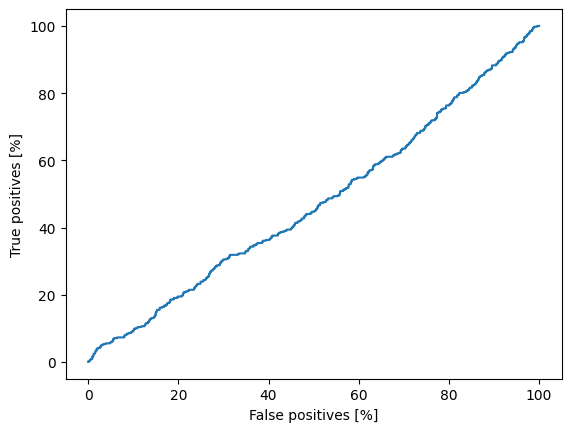

In [32]:
plot_roc(test_labels, test_gen)

Ideal Graph

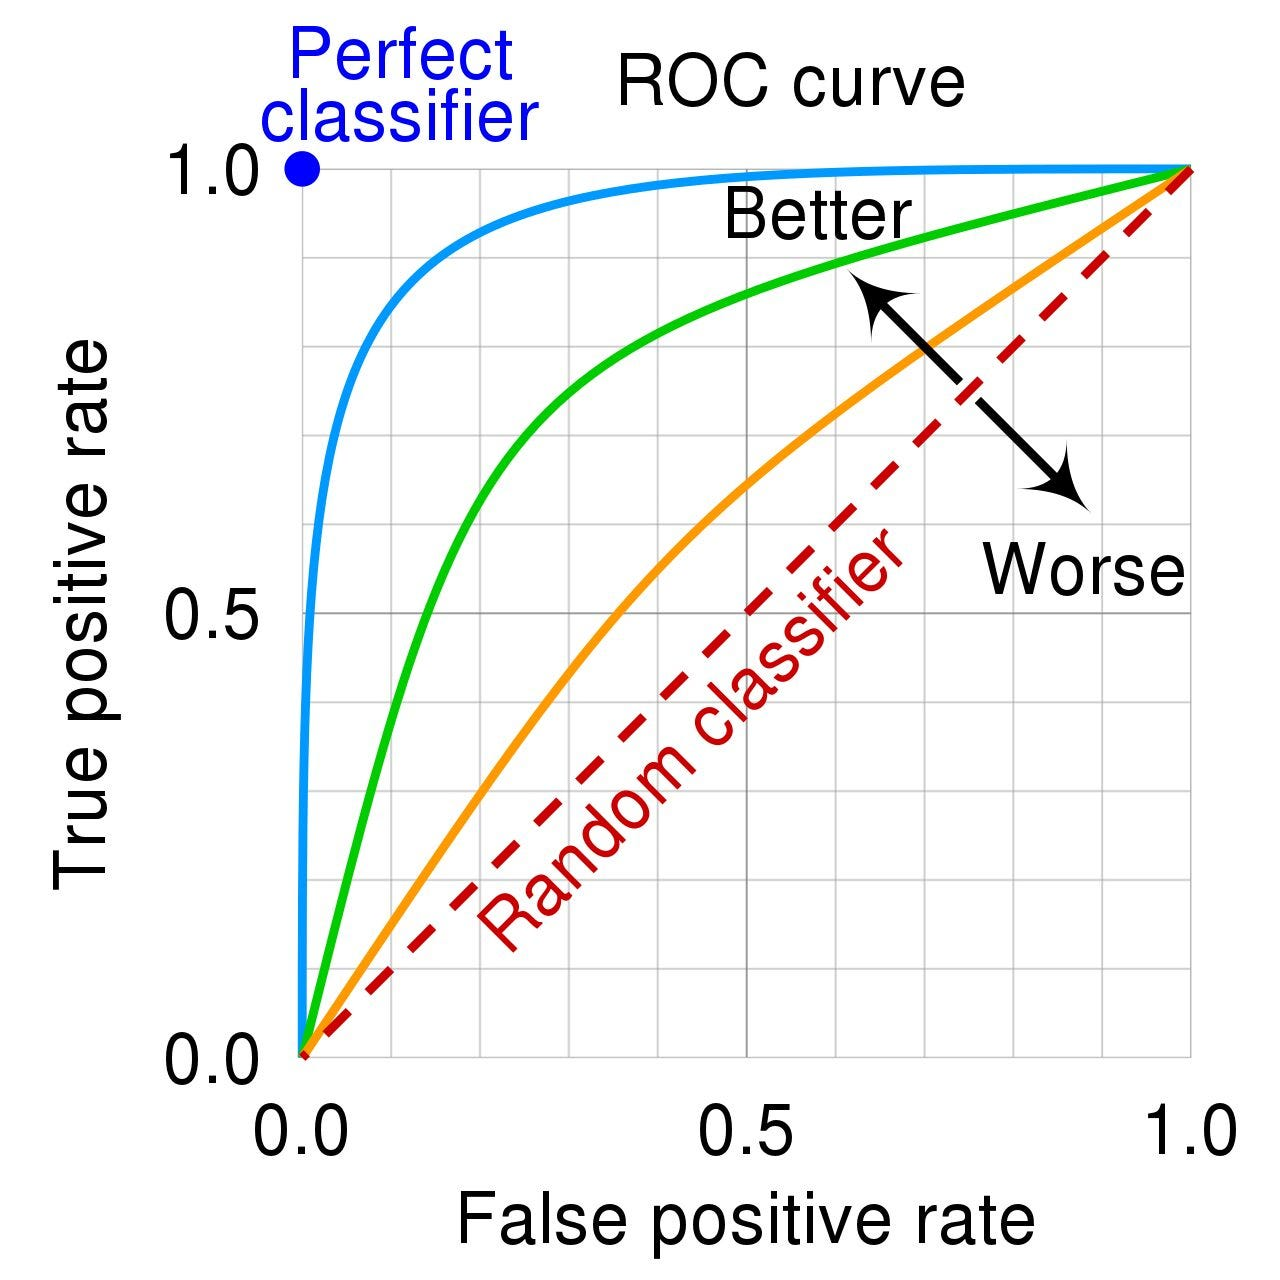

With increase in number of epochs, you will get better graph. Here we run for only 1 epoch